## Fourier Transform Test

#### import packages

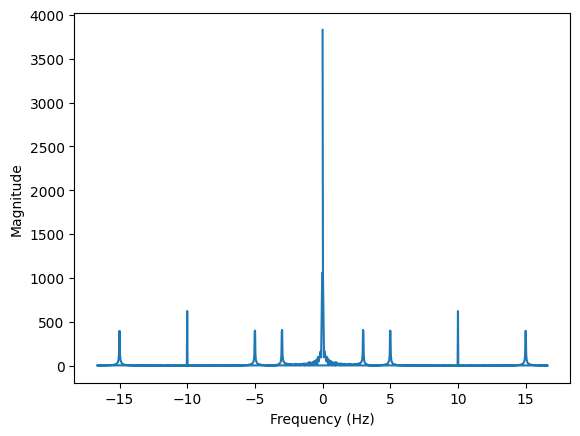

In [59]:
import numpy as np
import matplotlib.pyplot as plt

class Time:
    def __init__(self,duration):
        self.dt = duration / 1000
        self._series = np.arange(-duration*0.25,duration,self.dt)
        # self.dt = duration / (10000 * 1.25)
        # self._series = [self.dt * i for i in range(-250,10000,1)]
        # dt,series
        
    @property
    def series(self):
        return self._series
    
    def __len__(self):
        return len(self._series)
    
    @property
    def len_positive(self):
        return int(len(self._series) * 0.8)

    # def time_series_gen(self,duration):
    #     dt = duration / 1000 * 1.25
    #     series = [dt * i for i in range(-250,1000,1)]
    #     return dt,series

class Unit:
    def __init__(self,t0,time : Time) -> None:
        self.t0 = t0
        self.tS = time
        length = len(self.tS)
        self._series = [1 if self.tS.series[i] > -t0 else 0 for i in range(length)]
    
    @property 
    def series(self):
        return self._series
    
    def plot(self):
        fig,ax = plt.subplots()
        ax.plot(self.tS.series,self._series)
        
    def __len__(self):
        return len(self._series)
    
    def __add__(self,S2):
        # print()
        returnVal = Unit(self.t0,self.tS)
        returnVal._series = [self._series[i] + S2.series[i] for i in range(len(self.series))]
        return returnVal
    
    def __sub__(self,S2):
        returnVal = Unit(self.t0,self.tS)
        returnVal._series = [self._series[i] - S2.series[i] for i in range(len(self.series))]
        return returnVal
    

class Sine:
    def __init__(self,freq,time : Time,aplitude = 1) -> None:
        self.amplitude = aplitude
        self.freq = freq
        self.tS = time
        length = self.tS.len_positive
        self._series = [np.sin(2 * np.pi * self.freq * self.tS.series[i]) * self.amplitude for i in range(len(self.tS))]
        self.a = 2 * np.pi * self.freq
    
    @property 
    def series(self):
        return self._series
    
    def plot(self):
        fig,ax = plt.subplots()
        ax.plot(self.tS.series,self._series)
        
    def __len__(self):
        return len(self._series)
    
    def __add__(self,S2):
        # print()
        returnVal = Sine(self.freq,self.tS)
        returnVal._series = [self._series[i] + S2.series[i] for i in range(len(self.series))]
        return returnVal
    
    def __sub__(self,S2):
        returnVal = Sine(self.freq,self.tS)
        returnVal._series = [self._series[i] - S2.series[i] for i in range(len(self.series))]
        return returnVal
    

time1 = Time(30)
time2 = Time(5)
unit1 = Unit(0,time1)
unit2 = Unit(-2,time1)
unit3 = unit1 - unit2
# unit3.plot()

# fix,ax = plt.subplots()
sine1 = Sine(5,time1)
sine2 = Sine(10,time1)
sine1 = sine1 + sine2 + Sine(15,time1) + Sine(3,time1)
sine1 += unit2 + Unit(0,time1) + Unit(-3,time1) + Unit(0,time1)
# ax.grid()
# ax.plot(time1.series,[sine1.a/(time**2 + sine1.a**2) for i,time in enumerate(time1.series)])
ft1 : list = [0] * (len(time1))
for k in range(len(time1)):
    for n in range(len(time1)):
        ft1[k] += sine1.series[n] * np.exp(-2*np.pi*k*n*1j/len(time1))
        
# ft1 = [0] * len(time1)
# for k in range(len(time1)):
#     for n in range(len(time1)):
#         ft1[k] += sine1.series[n] * np.exp(-2 * np.pi * k * n * 1j / len(time1))
    # ft1[k] /= len(time1)


fig2, ax2 = plt.subplots()
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("Magnitude")
ax2.plot(np.fft.fftfreq(len(time1.series), time1.dt), np.abs(ft1))
plt.show()

# print(np.fft.fftfreq(len(time1.series), time1.dt))
# freq = [i / (time1.dt * len(time1)) for i in range(len(time1))]

# fig3,ax3 = plt.subplots()
# ax3.plot(freq,np.abs(np.real(ft1)))
# timePlot = [time / (np.pi*np.pi) for i,time in enumerate(time1.series)]
# for i in ax2:
#     i.grid()
# # ax2[0].plot(time1.series,np.real(ft1))
# ax2[1].plot(freq,np.real(ft1))

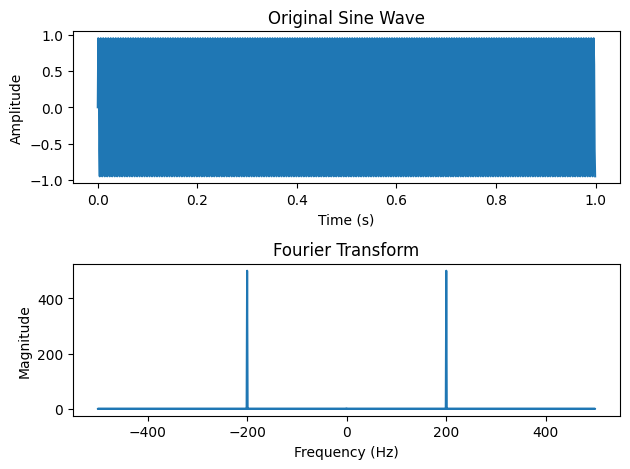

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a discrete sine wave array
frequency = 200  # Frequency of the sine wave
sampling_rate = 1000  # Sampling rate (samples per second)
duration = 1  # Duration of the signal in seconds
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
sine_wave = np.sin(2 * np.pi * frequency * t)

# Calculate the Fourier Transform
fourier_transform = np.fft.fft(sine_wave)
frequencies = np.fft.fftfreq(len(t), 1 / sampling_rate)

# Plot the original sine wave
plt.subplot(2, 1, 1)
plt.plot(t, sine_wave)
plt.title("Original Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Plot the magnitude of the Fourier Transform
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fourier_transform))
plt.title("Fourier Transform")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()